In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules 

In [36]:
df = pd.read_csv(r"C:\Users\oyedeepak\Downloads\Assignment\Association Rules\my_movies.csv")
df.head(10)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [37]:
df.drop(['V1', 'V2', 'V3', 'V4', 'V5'], axis = 1, inplace = True)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [53]:
frequent_itemsets = apriori(df, min_support = 0.2,max_len= 3, use_colnames = True)
print(rules)

    antecedents  consequents  antecedent support  consequent support  support  \
0     Gladiator      Patriot                 0.7                 0.6      0.6   
1       Patriot    Gladiator                 0.6                 0.7      0.6   
2     Gladiator  Sixth Sense                 0.7                 0.6      0.5   
3   Sixth Sense    Gladiator                 0.6                 0.7      0.5   
4       Patriot  Sixth Sense                 0.6                 0.6      0.4   
5   Sixth Sense      Patriot                 0.6                 0.6      0.4   
6     Gladiator  Sixth Sense                 0.6                 0.6      0.4   
7     Gladiator      Patriot                 0.5                 0.6      0.4   
8   Sixth Sense    Gladiator                 0.4                 0.7      0.4   
9     Gladiator  Sixth Sense                 0.7                 0.4      0.4   
10      Patriot    Gladiator                 0.6                 0.5      0.4   
11  Sixth Sense    Gladiator

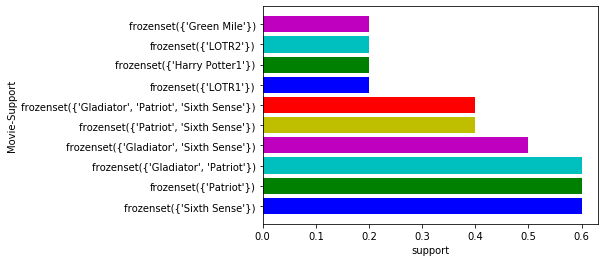

In [54]:
# Most Frequent movie item sets based on support 
frequent_itemsets.sort_values('support',ascending = False, inplace=True)
plt.barh(list(range(1,11)),frequent_itemsets.support[1:11],color='bgcmyr')
plt.yticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.ylabel('Movie-Support')
plt.xlabel('support')
plt.show()

In [59]:
#association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

rules.antecedents = rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents = rules.consequents.apply(lambda x: next(iter(x)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,Gladiator,Patriot,0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,Patriot,Gladiator,0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,Gladiator,Sixth Sense,0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
3,Sixth Sense,Gladiator,0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
4,Patriot,Sixth Sense,0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,Sixth Sense,Patriot,0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
6,Gladiator,Sixth Sense,0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,Gladiator,Patriot,0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,Sixth Sense,Gladiator,0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,Gladiator,Sixth Sense,0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


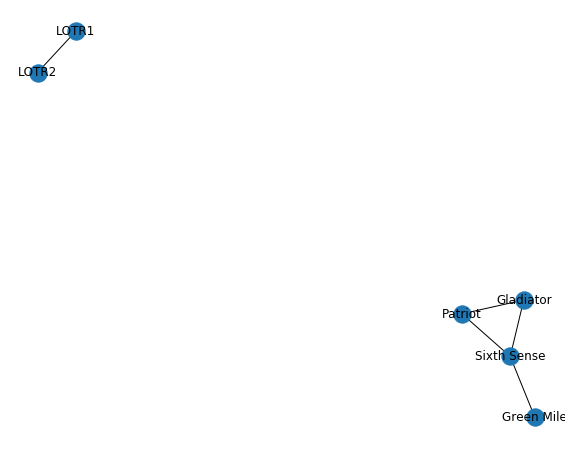

In [60]:
import networkx as nx


fig, ax=plt.subplots(figsize=(10,8))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [61]:
#Conclusion:
#Those who watched LOTR1 also watched LOTR2
#Those who watched Green Mile also watched Sixth Sense, Gladiator and Patriot